<a href="https://colab.research.google.com/github/jeanraisa/Linear-Regression-Summative/blob/main/insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import encoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib


In [4]:
# Load the dataset
data = pd.read_csv("data/insurance.csv")

In [5]:
data.shape

(1338, 7)

In [6]:
data.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


In [7]:
Data = data.drop(columns=['region'])

In [8]:
Data.shape

(1338, 6)

In [9]:
Data.drop_duplicates(inplace=True)

In [10]:
Data.shape

(1337, 6)

In [11]:
Data.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [12]:
encoder = LabelEncoder()
Data['sex'] = encoder.fit_transform(Data['sex'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
Data['smoker'] = encoder.fit_transform(Data['smoker'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'female': np.int64(0), 'male': np.int64(1)}
{'no': np.int64(0), 'yes': np.int64(1)}


In [13]:
x=Data.drop(columns=['expenses'])
y=Data['expenses']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_train

536      5972.38
1095     4561.19
629     42983.46
411     19594.81
773     17748.51
          ...   
1096    44641.20
1131     3693.43
1295     1964.78
861      7151.09
1127     5836.52
Name: expenses, Length: 1203, dtype: float64

In [18]:
y_pred = model.predict(x_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_abs_err)

mean_sq_err = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error: ", mean_sq_err)

r2 = r2_score(y_test, y_pred)*100
print("R2 Score: ", r2)
print(model.score(x_test, y_test)*100)

Mean Absolute Error:  4381.902434625548
Mean Squared Error:  39047250.17524025
R2 Score:  78.24534062329494
78.24534062329494


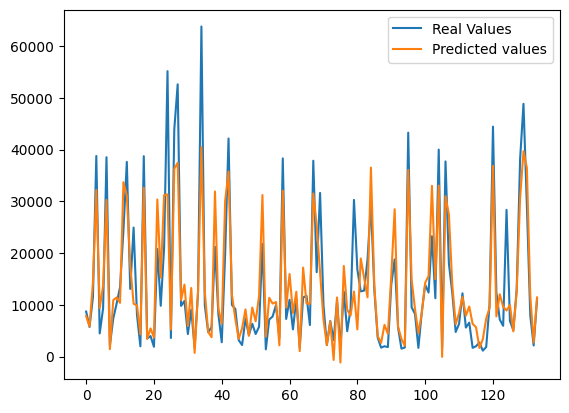

In [19]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label="Real Values")
plt.plot(y_pred, label="Predicted values")
plt.legend()
plt.show()

In [20]:
joblib.dump(model, "insurance.joblib")

['insurance.joblib']